---
# 프로젝트 명: MLB 데이터를 활용한 회귀모델 생성 및 결과분석

## 데이터 출처: [Moneyball | Kaggle](https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012)

## 프로젝트 목표
    MLB Moneyball 데이터와 강의 실습시간에 배운 내용으로 회귀분석 및 로지스틱회귀분석 모델 생성
        - 한 시즌 동안 승리한 횟수(W) 예측 회귀분석 모델, 플레이오프 진출 여부(Playoffs) 결정 로지스틱회귀분석 모델 생성
    독립변수들과 종속변수와의 인과관계를 고려하여 모델에 영향력이 큰 유의미한 독립변수 찾기
        - 기존의 독립변수를 조합하여 만든 변수로 예측해보기
        - 변수선택법(전진선택법, 후진소거법)으로 최적의 변수 조합 찾기
        - 다중공선성 문제 확인
    회귀모델의 결과를 해석하는 방법 습득

## 프로젝트 구성
    - 시각화를 통한 데이터의 이해
    - RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - 회귀분석 결과의 해석
    - 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
    - 로지스틱회귀 모델 생성
    - 변수 선택법으로 로지스틱회귀분석 정확도 올리기

## 프로젝트 과정
    - 데이터의 간단한 시각화에서부터 회귀분석과 로지스틱회귀분석 문제 해결까지 강의 실습 내용 확인
    - 모델 생성 및 해석에 대한 내용에 집중하기 위해서 학습데이터와 테스트데이터를 구분하지 않고 진행
    - 강의 실습 시간에 다룬 자료를 이용해서 코드 작성

- 작성자: 김민중 감수자

---

### Context

In the early 2000s, Billy Beane and Paul DePodesta worked for the Oakland Athletics. While there, they literally changed the game of baseball. They didn't do it using a bat or glove, and they certainly didn't do it by throwing money at the issue; in fact, money was the issue. They didn't have enough of it, but they were still expected to keep up with teams that had much deeper pockets. This is where Statistics came riding down the hillside on a white horse to save the day. This data set contains some of the information that was available to Beane and DePodesta in the early 2000s, and it can be used to better understand their methods.

### Content

This data set contains a set of variables that Beane and DePodesta focused heavily on. They determined that stats like on-base percentage (OBP) and slugging percentage (SLG) were very important when it came to scoring runs, however they were largely undervalued by most scouts at the time. This translated to a gold mine for Beane and DePodesta. Since these players weren't being looked at by other teams, they could recruit these players on a small budget. The variables are as follows:

- Team, 팀
- League, 리그
- Year, 연도
- Runs Scored (RS), 득점 수
- Runs Allowed (RA), 실점 수
- Wins (W), 승리 횟수
- On-Base Percentage (OBP), 출루율
- Slugging Percentage (SLG), 장타율
- Batting Average (BA), 타율
- Playoffs (binary), 플레이오프 진출 여부
- RankSeason, 시즌 순위
- RankPlayoffs 플레이오프 순위
- Games Played (G), 경기 수
- Opponent On-Base Percentage (OOBP), 도루 허용률
- Opponent Slugging Percentage (OSLG), 피장타율

### [Baseball statistics](https://en.wikipedia.org/wiki/Baseball_statistics)을 살펴보면 각 변수의 정확한 의미를 파악할 수 있다.

# 아래 코드를 실행해주세요.

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sys

print("python version: ", sys.version)
print("pandas version: ", pd.__version__)
#print("statsmodels version: ", sm.__version__)
print("numpy version: ", np.__version__)

%matplotlib inline

python version:  3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
pandas version:  1.1.3
numpy version:  1.19.2


In [2]:
moneyball = pd.read_csv("./data/baseball.csv", encoding="utf8")
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
# 데이터의 간단한 정보 파악(na의 개수 및 데이터 타입)
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [4]:
# na가 있는 컬럼인 RankSeason, RankPlayoffs을 제거
moneyball = moneyball.dropna(axis=1)
moneyball.info()

# 1232개의 object와 11개의 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      1232 non-null   object 
 1   League    1232 non-null   object 
 2   Year      1232 non-null   int64  
 3   RS        1232 non-null   int64  
 4   RA        1232 non-null   int64  
 5   W         1232 non-null   int64  
 6   OBP       1232 non-null   float64
 7   SLG       1232 non-null   float64
 8   BA        1232 non-null   float64
 9   Playoffs  1232 non-null   int64  
 10  G         1232 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 106.0+ KB


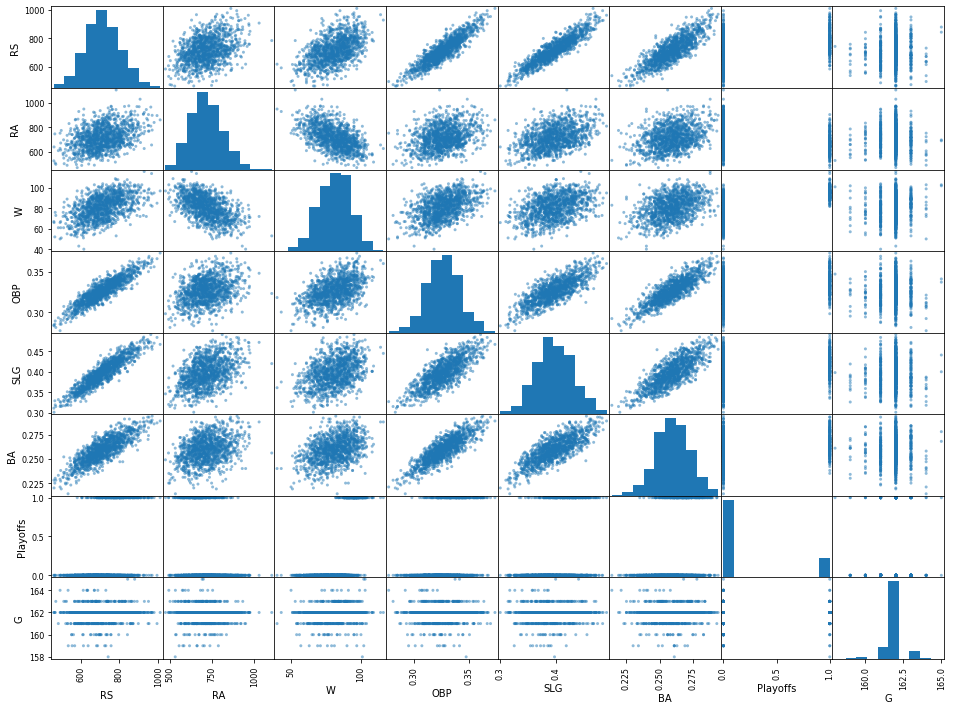

In [5]:
# Object 변수 및 불필요한 변수 제거해서 단순 시각화

selected_df = moneyball.select_dtypes(exclude=['object'])
selected_df = selected_df.drop(["Year"], axis=1)
_ = pd.plotting.scatter_matrix(selected_df,
                               alpha = 0.5, figsize=(16,12))

## STEP 1. 시각화를 통한 데이터의 이해 
- 다양한 수치값을 갖는 변수들의 산포도를 보고 받은 통찰(insight)은 무엇인가?
- 상관관계를 보이는 데이터들은 존재하는가? 있다면 어떤 변수들이 어떤 관계에 있는지 대답하시오.
- 경기 수(G)의 히스토그램은 어떤 의미를 갖는가? 또한 다른 변수들의 히스토그램을 보고 해석하시오.

### [풀이] 
- 변수들 간의 상관관계를 대략적으로 예측할 수 있다.
- RS, OBP, SLG, BA는 각각이 비례관계에 있다. RA는 W와 약한 음의 관계를 보인다.
- 대부분 경기수는 162이며 그 이외의 경기 수는 매우 적다.

## STEP 2. RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 가정: 시즌 총 득점(RS)이 승리에 영향을 줄 것이다.
- RS를 독립변수로 W를 예측한 단순선형모델 직선의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha RS + \beta
$$


- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
- 기울기는 0.0641이며, 절편은 35.0964이다.
- 𝑅2은 0.262으로 크지 않으므로 적당한 모델이라고 할 수 없다.

<AxesSubplot:xlabel='RS', ylabel='W'>

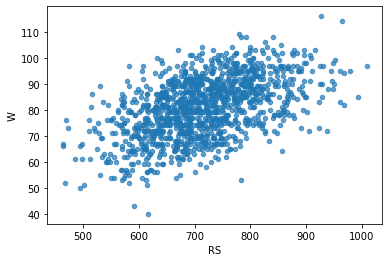

In [6]:
moneyball.plot.scatter(x = "RS", y = "W", alpha = 0.7)

In [7]:
target = moneyball['W']
rs = moneyball['RS']
rs1 = sm.add_constant(rs, has_constant="add")

model1 = sm.OLS(target, rs1)
fit_simple_model = model1.fit()

In [8]:
fit_simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     436.4
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.50e-83
Time:                        12:10:11   Log-Likelihood:                -4565.1
No. Observations:                1232   AIC:                             9134.
Df Residuals:                    1230   BIC:                             9144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0964      2.211     15.876      0.000      30.759      39.434
RS             0.0641      0.003     20.890      0.000       0.058       0.070
==============================================================================
Omnibus:                       14.041   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.799
Skew:                          -0.134   Prob(JB):                      0.00452
Kurtosis:                       2.627   Cond. No.                     5.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Linear Regression')

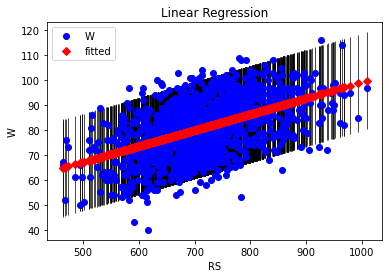

In [9]:
# 참고
# Fit된 직선 그리기. sm을 이용해서 선형회귀분석을 한 경우 
# 아래와 같이 간단한 코드로 적합된 직선과 원래 데이터의 그림을 그릴 수 있음.

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RS")
ax.set_title("Linear Regression")

### Comments
- 득점 RS로 W를 예측한 단순선형회귀분석의 적합도는 만족하기 어려움(R squared 값으로 판단).
- 시즌 총 실점 RA를 독립변수로 W를 예측하는 단순선형회귀분석의 결과는 어떠한가? 만족할 만한가? 
- RS를 RA로 변경해서 기울기와 절편 및 R squared를 구해보시오. 

### [풀이] 
- RA의 기울기는 -0.0655이고, 절편은 127.7690, R2은 0.283이다. RS에 비해서는 R2값이 조금 커졌지만 여전히 작은 값으로 만족할만하지 않다.

In [11]:
ra = moneyball['RA']
ra1 = sm.add_constant(ra, has_constant="add")
model2 = sm.OLS(target, ra1)
fit_simple_model2 = model2.fit()

In [12]:
fit_simple_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     486.5
Date:                Mon, 10 May 2021   Prob (F-statistic):           4.06e-91
Time:                        12:11:25   Log-Likelihood:                -4546.8
No. Observations:                1232   AIC:                             9098.
Df Residuals:                    1230   BIC:                             9108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.7690      2.143     59.634      0.000     123.566     131.973
RA            -0.0655      0.003    -22.058      0.000      -0.071      -0.060
==============================================================================
Omnibus:                        5.903   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.615
Skew:                          -0.127   Prob(JB):                       0.0604
Kurtosis:                       2.789   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## STEP 3. (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 득점과 실점이 승리 수와 관련이 없을까? 경기에서 승리하려면 상대보다 득점을 많이 해야한다. 즉, (득점 - 실점)을 새로운 독립변수로 설정하고 W를 예측하는 단순선형회귀분석을 해보시오.
- 가정: 시즌 총 득점(RS)과 실점(RA)의 차이가 승리에 영향을 줄 것이다.
- 강의 실습 시간에 학습한 statsmodels 라이브러리를 이용해서 아래의 질문에 답하시오.
- (RS-RA)를 독립변수로 W를 예측한 단순선형모델의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha \cdot (RS-RA) + \beta
$$

- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
- 기울기는 0.1045이고, 절편은 80.9042이다.
- R2은 0.88로 만족스러운 결과이므로 적당한 모델이라고 할 수 있다.

In [13]:
moneyball['RS_RA'] = moneyball['RS'] - moneyball['RA']
print(moneyball['RS_RA'])

0        46
1       100
2         7
3       -72
4      -146
       ... 
1227    -54
1228     80
1229    188
1230    110
1231   -117
Name: RS_RA, Length: 1232, dtype: int64


In [14]:
rs_ra = moneyball['RS_RA']
rs_ra1 = sm.add_constant(rs_ra, has_constant="add")
model3 = sm.OLS(target, rs_ra1)
fit_simple_model3 = model3.fit()

In [15]:
fit_simple_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     8983.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        12:13:50   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6901.
Df Residuals:                    1230   BIC:                             6911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9042      0.113    713.853      0.000      80.682      81.127
RS_RA          0.1045      0.001     94.778      0.000       0.102       0.107
==============================================================================
Omnibus:                        0.797   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.686
Skew:                          -0.041   Prob(JB):                        0.710
Kurtosis:                       3.081   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## STEP 4. 회귀분석 결과의 해석
- 득점과 실점이 개별적으로 한 개씩만 본다면 승리 예측에 큰 영향을 주지 못하지만 (득점 - 실점)으로 결합한 변수는 승리 예측에 유의미하게 영향을 주었다. 이런 작용은 무엇이라고 하는가?
- 다시 RS, RA를 두 개의 독립변수로 W를 예측한 선형모델의 기울기 $\alpha_1$, $\alpha_2$와 절편 $\beta$는 몇인가?

$$
W = \alpha_1 RS + \alpha_2 RA + \beta
$$

- RS, RA를 두 개의 독립변수로 W를 예측한 모델과 (RS-RA)을 독립변수로 W를 예측한 모델은 무슨 차이가 있을까?
- 회귀분석 결과인 $\alpha_1$, $\alpha_2$와 (RS-RA)의 계수인 $\alpha$를 비교해보고 RS와 RA의 차이가 승리에 큰 영향을 미친다고 결론 내릴 수 있는가?

### [풀이] 
- 개별 변수는 W에 큰 영향을 주지 못했지만 두 변수의 차이는 큰 영향을 주었는데 이러한 작용을 교호작용이라고 한다.
- 기울기 $\alpha_1: $ 0.1045, $\alpha_2: $-0.1046, 절편 $\beta: $ 80.9805이다. 
- (RS-RA) ~ W 모델은 (RS-RA)에 곱해지는 기울기와 절편, 즉 두 개의 계수를 찾는 모델이다. 그리고 RS, RA 두 독립변수로 W를 예측하는 모델은 RS와 RA에 각각 곱해지는 계수들과 절편, 즉 세 개의 계수를 찾는 모델이다. 이 모델은 (RS-RA) ~ W 모델과는 다르게 RS와 RA에 곱해지는 계수들은 독립적으로 결정된다.
- 그렇다. 독립적으로 얻은 $\alpha_1$과 $\alpha_2$ 값의 조합이 (RS-RA)의 계수인 $\alpha$와 매우 가까운 값으로 나왔다. 즉 (RS-RA)가 승리 수 W 예측에 큰 영향을 준다고 할 수 있다.

In [17]:
x_data = moneyball[['RS', 'RA']]
x_data1 = sm.add_constant(x_data, has_constant="add")
multi_model = sm.OLS(target, x_data1)
fit_multi_model = multi_model.fit()

In [18]:
x_data1

,const,RS,RA
0,1.0,734,688
1,1.0,700,600
2,1.0,712,705
3,1.0,734,806
4,1.0,613,759
...,...,...,...
1227,1.0,705,759
1228,1.0,706,626
1229,1.0,878,690
1230,1.0,774,664


In [19]:
fit_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     4488.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        12:19:41   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6903.
Df Residuals:                    1229   BIC:                             6918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9805      1.064     76.111      0.000      78.893      83.068
RS             0.1045      0.001     77.995      0.000       0.102       0.107
RA            -0.1046      0.001    -79.393      0.000      -0.107      -0.102
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.691
Skew:                          -0.041   Prob(JB):                        0.708
Kurtosis:                       3.081   Cond. No.                     9.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print(fit_simple_model3.params)
print(fit_multi_model.params)

const    80.904221
RS_RA     0.104548
dtype: float64
const    80.980456
RS        0.104493
RA       -0.104600
dtype: float64


## STEP 5. 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
- [RS, RA, OBP, SLG, BA, G] 6개 독립변수로 W를 예측하는 다중회귀분석 하시오.
- RS, RA 두 독립변수의 모델과 비교했을 때 결과가 향상됐다고 할 수 있는가?
- 결과가 향상되지 않았다면 다중공선성 문제가 있을 수 있다고 판단할 수 있는데 정량적인 수치로 확인해보시오. VIF를 구하고 결과를 해석하시오(특별히 RS의 VIF 수치가 높게 나온 이유를 한번 생각해 보시오).
    - RS, RA 두 변수로도 충분히 W를 설명 가능했었습니다. 이를 어떻게 해석해야 할까요?
    - G의 VIF 수치는 어떻게 해석해야 할까요? 가장 낮은 VIF가 예측에 중요한 변수인가요?
- 주의 statsmodels에는 항상 상수항을 넣어주어야 한다. VIF도 마찬가지임. [참고](https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python)

### [풀이] 
- R2이 0.001 증가했지만 두 독립변수의 모델과 비교했을 때 큰 증가는 아니기 때문에 향상됐다고 할 수 없다.
- RS가 OBP, SLG, BA가 상관관계를 갖고있기때문에 다중공선성이 있어서 RS의 VIF수치가 매우 높게 나온다. 그래서 RS, RA만 가지고도 충분히 W를 예측할 수 있다. 
- G의 VIF 수치가 가장 낮다. 즉, 다른 변수와의 선형 연관성이 없어 보인다. 중요한 변수인지 아닌지는 이것만 가지고 판단할 수 없다.

In [22]:
x2_data = moneyball[['RS', 'RA', 'OBP', 'SLG', 'BA', 'G']]
x2_data2 = sm.add_constant(x2_data, has_constant="add")
multi_model2 = sm.OLS(target, x2_data2)
fit_multi_model2 = multi_model2.fit()

In [23]:
fit_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1514.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        12:21:47   Log-Likelihood:                -3440.1
No. Observations:                1232   AIC:                             6894.
Df Residuals:                    1225   BIC:                             6930.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0766     30.741     -0.393      0.695     -72.388      48.235
RS             0.0912      0.005     19.957      0.000       0.082       0.100
RA            -0.1050      0.001    -77.700      0.000      -0.108      -0.102
OBP           58.5427     20.365      2.875      0.004      18.588      98.497
SLG           22.9386      9.409      2.438      0.015       4.480      41.397
BA           -27.0409     17.942     -1.507      0.132     -62.241       8.159
G              0.5040      0.184      2.742      0.006       0.143       0.865
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.297
Skew:                          -0.025   Prob(JB):                        0.862
Kurtosis:                       3.057   Cond. No.                     2.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
x2_data.corr()

,RS,RA,OBP,SLG,BA,G
RS,1.000000,0.380139,0.900492,0.918740,0.827000,0.075195
RA,0.380139,1.000000,0.326360,0.436527,0.330764,-0.023369
OBP,0.900492,0.326360,1.000000,0.790910,0.851958,0.016563
SLG,0.918740,0.436527,0.790910,1.000000,0.790481,0.036770
BA,0.827000,0.330764,0.851958,0.790481,1.000000,0.019886
G,0.075195,-0.023369,0.016563,0.036770,0.019886,1.000000


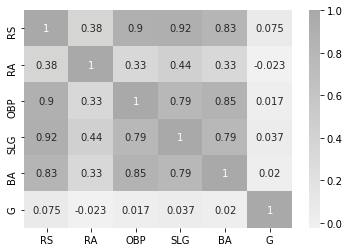

In [25]:
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x2_data.corr(), annot=True, cmap=cmap)
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x2_data2.values, i) for i in range(x2_data2.shape[1])]
vif["features"] = x2_data2.columns

In [30]:
vif.iloc[1:]

,VIF Factor,features
1,13.745013,RS
2,1.241633,RA
3,7.338020,OBP
4,7.690644,SLG
5,4.209910,BA
6,1.033843,G


<AxesSubplot:>

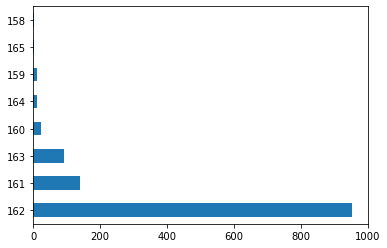

In [33]:
# 참고: 경기수 G 히스토그램
moneyball["G"].value_counts().plot.barh()
# 대부분 162 근처에 있음

In [34]:
# 참고로 선형회귀분석의 다양한 통계적인 결과 수치를 원치 않는 경우
# sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.

from sklearn.linear_model import LinearRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LinearRegression().fit(moneyball[["RS", "RA"]], moneyball["W"])
print("r squared:", reg.score(moneyball[["RS", "RA"]], moneyball["W"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

r squared: 0.8795651418768365
coefficients:  [ 0.10449347 -0.10460008]
intercept:  80.98045555972712


## STEP 6. 로지스틱회귀 모델 생성
- RS와 RA 두 독립변수로 플레이오프(Playoffs) 진출 여부를 결정하는 로지스틱회귀분석 모델을 생성해보시오.
- Confusion matrix, AUC, ROC 곡선을 이용해서 결과를 해석해 보시오.
- 참고
    - [Scikit learn confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [Model Evaluation Techniques for Classification models](https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b)
    - [Evaluating a Classification Model]()

### [풀이] 
- AUC값은 0.928로 매우 높고 ROC곡선도 증가할수록 1에 수렴하는 모양이기 때문에 정확도가 매우 높다고 할 수 있다.

In [37]:
target2 = moneyball["Playoffs"]

model = sm.Logit(target2, x_data1)
fit_logit_model = model.fit()

Optimization terminated successfully.
         Current function value: 0.256725
         Iterations 8


In [38]:
fit_logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                 1232
Model:                          Logit   Df Residuals:                     1229
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.4842
Time:                        12:33:19   Log-Likelihood:                -316.28
converged:                       True   LL-Null:                       -613.15
Covariance Type:            nonrobust   LLR p-value:                1.178e-129
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0982      0.980     -5.200      0.000      -7.020      -3.177
RS             0.0327      0.002     14.422      0.000       0.028       0.037
RA            -0.0300      0.002    -13.465      0.000      -0.034      -0.026
==============================================================================
"""

In [39]:
# 참고로 선형회귀분석과 마찬가지로 sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.
# 위 결과와 비교해보시오.

from sklearn.linear_model import LogisticRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LogisticRegression().fit(moneyball[["RS", "RA"]], moneyball["Playoffs"])
print("mean accuracy:", reg.score(moneyball[["RS", "RA"]], moneyball["Playoffs"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

mean accuracy: 0.885551948051948
coefficients:  [[ 0.03268497 -0.02999918]]
intercept:  [-5.09819896]


### Comments
- 로지스틱회귀분석은 주어진 독립변수의 공간을 선형으로 분리한다고 수학적으로 해석할 수 있다. 조금 더 자세히 설명하면 로지스틱회귀분석의 결과로 우리는 아래 식의 계수들 $\alpha_1, \alpha_2, \beta$를 얻었다. 플레이오프의 진출 여부를 0 ~ 1사이의 확률 값으로 출력하는 식이 로지스틱회귀분석의 결과이다. 여기서 진출 여부의 판단 기준을 $1/2$로 한다고 가정해보자(일반적으로 $1/2$ 확률로 판단하지만 모델이나 상황에 따라서 조절할 수도 있다).

$$
\text{Playoffs} = \frac{1}{1 + e^{(\alpha_1 RS + \alpha_2 RA + \beta)}}
$$

- 왼쪽 플레이오프 진출 확률을 1/2로 두고 식을 정리하면 다음과 같다.

$$
\alpha_1 RS + \alpha_2 RA + \beta = 0
$$

- 결과적으로 위 식을 만족하는 RS와 RA 값들은 아래와 같은 빨간색 선과 같은 직선의 형태를 띤다. 직선(선형)을 기준으로 한쪽 영역은 플레이오프 진출 못함, 반대쪽은 플레이오프 진출함으로 판단되는 것이다(물론 로지스틱회귀분석모델의 판단). 

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/logistic.png)


- 이처럼 로지스틱회귀분석은 주어진 독립변수 공간을 선형으로 분리해서 이진 분류하는 방식이기 때문에 XOR 문제를 해결하기 어려운 것이다(XOR은 선형으로 해결 불가능). 그림 출처: https://web.stanford.edu/~jurafsky/slp3/7.pdf

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/xor.png)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

pred = (fit_logit_model.predict(x_data1) >= 0.5) * 1
cfmat = confusion_matrix(target2 ,pred)
print(cfmat)

[[940  48]
 [ 93 151]]


AUC: 0.9330428253799695


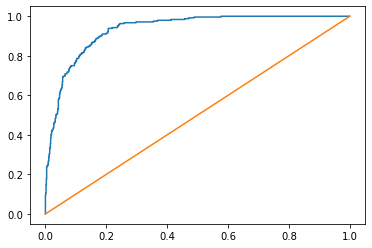

In [41]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(target2, 
                                         fit_logit_model.predict(x_data1), 
                                         pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1])
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

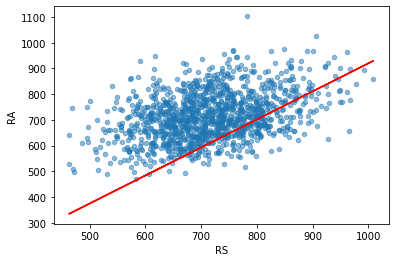

In [43]:
line_x = moneyball["RS"]
fit_logit = fit_logit_model
line_y = (- fit_logit.params["RS"] * moneyball["RS"]  - fit_logit.params["const"] ) \
          / fit_logit.params["RA"]

moneyball.plot.scatter(x = "RS", y = "RA", alpha = 0.5)
plt.plot(line_x, line_y, "r")

## STEP 7. 변수 선택법으로 로지스틱회귀분석 정확도 올리기
- RS, RA, OBP, SLG, BA, G을 독립변수를 사용해서(상수항 포함) 플레이오프 진출 여부를 결정하는 로지스틱회귀분석 모델을 만들어 보시오.

### [풀이] 
- 

In [44]:
model2 = sm.Logit(target2, x2_data2)
fit_logit_model2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.253002
         Iterations 9


In [46]:
fit_logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                 1232
Model:                          Logit   Df Residuals:                     1225
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.4916
Time:                        12:41:14   Log-Likelihood:                -311.70
converged:                       True   LL-Null:                       -613.15
Covariance Type:            nonrobust   LLR p-value:                5.493e-127
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0517     29.004     -0.243      0.808     -63.899      49.795
RS             0.0230      0.004      5.311      0.000       0.015       0.031
RA            -0.0311      0.002    -13.331      0.000      -0.036      -0.026
OBP           44.8459     18.453      2.430      0.015       8.679      81.013
SLG           18.9428      8.276      2.289      0.022       2.722      35.163
BA           -22.7653     15.575     -1.462      0.144     -53.292       7.761
G             -0.0411      0.173     -0.238      0.812      -0.380       0.298
==============================================================================
"""

## 참고
- 통계 라이브러리에 특화(?)된 R에서는 회귀분석 모델 생성, 변수선택법, VIF 등 통계분석을 쉽게 수행할 수 있다.
- 위에서 수행했던 내용을 R로 실행한 내용입니다.
- [R vs Python 회귀분석모델](https://s3.ap-northeast-2.amazonaws.com/mjgim.assets/2.+Regression+in+R.html)